# 1. Introduction

## 1.1 Description of Problem

The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways. This project aims in classifying if a malware can/can’t infect a window’s machine based on different properties of the machine.  The model classifies if a machine is getting infected by malware by performing Machine learning algorithms such as Support Vector Machines, Logistic Regression and LightGBM  and then compare the performance of the models using some performance metrics such as Area under curve, F1 score and precision recall.

## 1.2 Motivation of Problem

The problem is one of those real world problems where machine learning can be used to benefit users from getting attacked by malware. This problem was selected as it helps us to apply machine learning algorithm in one of the real world problems. The classification problem also helps us in learning some of the basic feature engineering techniques such as categorical feature handling using one hot encoder, handling large datasets and deriving new features from existing ones which are essential for any machine learning engineer. Moreover this problem helps us in applying algorithms learnt during the course such as applying Support Vector Machines using Linear and Gaussian Kernel on a large dataset as well as exploring into the world of competitive Machine learning where we would be testing algorithms such as LightGBM which is a tree based ensemble model.

# 2. References

1.https://www.kaggle.com/c/microsoft-malware-prediction/<br>
2.https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d<br>
3.https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc<br>
4.https://lightgbm.readthedocs.io/en/latest/<br>


# 3. Model

## 3.1 Description of Methodology

#####  Splitting data into training and validation set <br>
For reduing the search space for hyper parameter testing, we will split the training data into training and validation data in a 75% 25% ratio. This data will be randomly picked using train_test_split. Actual validation testing will be discussed below<br>
<br>
##### Replacing missing data <br>
We intend to replace all the missing values ( NAN ) of numerical features with the median value for that particular feature. For categorical features we will replace the missing values with the mode. 
<br>
##### Feature Engineering <br>
For some of the features such as ‘Census_InternalBatteryType’ we group the data as lithiom or not. For that we find the instances which have li as the prefix. We also create numerically engineered features such as “Disk_remain” using  'Census_PrimaryDiskTotalCapacity' and 'Census_SystemVolumeTotalCapacity'. We intend to the same modifications with the test data as well.
##### Categorical Feature Handling <br>
There are around 30 features having categorical features. We use one hot encoding for all the categorical features before deploying a Machine Learning model. <br>
To do this we will use use OneHotEncoder() from sklearn.preprocessing. The new feature vector would then be stored in sparse matrix in order to reduce memory footprint as well as improve the performance of the machine learning model.
The same encoding will be performed to the test data as well<br>
Alternatively, if one hot encoding takes a lot of time to train our model, we will use ordinal encoding which can be used with tree based model. Since LightGBM handles categorical features internally, we won’t be needing to do that explicitly.<br>
##### Dimensionality Reduction <br>
Since after one hot encoding, the dimension of the design matrix becomes huge such that training our model becomes computationally expensive. We use only a set of selected features for training our model. We use RandomForestClassifier to give us an initial estimate of the importance of features. After that we threshold the importance and remove the features which lie below a certain threshold 
<br>
##### Machine Learning Model
We will be using three machine learning models and will be comparing their performance
1. Random Forest - We are using sklearn's RandomForestClassifier to train our model. 
2. Linear SVM - We are using sklearn's LinearSVC to train our model. The implementation of LinearSVC will be done in two ways. One will be with the entire design matrix and the second will be after removing the features according to the importance values we receive from Random Forest. We will test our hypothesis that SVM will perform better if unimportant features are removed from the dataset
3. LGBMClassifier. We are training our model using one of the popular techniques used in competetive Machine learning community. Since we do not require One hot encoding for this, we will train the model using the original dataset. LGBMClassifier uses internal frequency coding for handling categorical features
We will compare the performance of each model<br>
##### Validation Testing<br>
Validation testing would be performed using K-Fold validation technique. We would be using a 5 fold validation since the daa would be large. Sk-learn’s KFold package would be used for this purpose<br>
##### HyperParameter Tuning<br>
GridSearchCV will be used for tuning our SVM model. Parameters like C and gamma will be tuned. Since GridSearchCV does K fold validation internally, we wont need to do validation testing explicitly<br>
##### Performance Testing<br>
We will measure the accuracy of the classification through a AccuracyScore of sklearn. Moreover we would plot the confusion matrix for checking for false positives and false negatives. Area under the curve will be used to check for false positives against true positives.


## 3.2 Algorithm

In this section, we will briefly discuss the steps we have taken to calculate the accuracy of our model in the notebook


1. Load the data. Split the data into labels and training data<br>
2. Do feature engineering<br>
2.1. Convert 'SmartScreen' to lower<br>
2.2. Group  'Census_InternalBatteryType' according to lithium and non lithium<br>
2.3. Numerically generate more features.<br>
3. Impute mssing values. Impute using median for numerical features and mode for categorical features<br>
4. One hot encode the data<br>
5. Train RandomForestClassifier as follows<br>
5.1. Reduce the search space over hyper parameters by individually conducting validation testing for each parameter. Hyper parameters = min_leaves, n_estimators,max_depth<br>
5.2. Do GridSearchCV over the reduced hyperparameter space<br>
5.3. Train the model using the best hyper parameters using the results from the above steps<br>
5.4. Obtain accuracy from the test data by taking a mean over the misclassifications<br>
5.5 Store the feature importances<br>
6. Train SVM as follows<br>
6.1 Do hyperparameter tuning over C using GridSearchCV<br>
6.2 Repeat steps 5.3 - 5.5 to obtain accuracy<br>
7. Train SVM after performing dimensionality reduction as follows<br>
7.1 Using feature importance, perform thresholding by taking the least 10 important feature values from random forest and removing features which have importance less than that. Do validation testing to obtain performance metrics<br>
7.2 Train the model using the dataset dimensions having the least error. Perform hyperparameter tuning and then repeat steps 5.3-5.5 to obtain accuracy<br>
8. Train LGBMClassifier in the same way Random forest was trained to obtain accuracy<br>
9. Plot Confusion matrix and obtain AUC score using sklearn from predicted labels and true labels<br>


# 4. Experiments 

In the following section we will go through the code

## 4.1 Description of dataset

The data set was obtained from kaggle https://www.kaggle.com/c/microsoft-malware-prediction/data

The goal of this competition is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. The telemetry data containing these properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender.

Each row in this dataset corresponds to a machine, uniquely identified by a MachineIdentifier. HasDetections is the ground truth and indicates that Malware was detected on the machine. Using the information and labels in train.csv, you must predict the value for HasDetections for each machine in test.csv.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pickle
import os
from sklearn.model_selection import train_test_split
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_excel("train.xlsx",low_memory=True)
X_test = pd.read_excel("test.xlsx",low_memory=True)

Below are some statistics of the dataset we have. The data does not display characteristics of categorical features

In [3]:
data.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,149999.0,149426.000000,149999.000000,7283.000000,149397.000000,149397.000000,149397.000000,149999.000000,149999.000000,144573.000000,...,147318.000000,149999.000000,54800.0,149731.000000,149999.000000,149999.000000,148772.000000,144949.000000,144949.000000,149999.000000
mean,0.0,6.845817,0.017427,1645.883839,47864.525278,1.324766,1.020944,0.987493,108.105854,81293.794547,...,33034.742116,0.485663,0.0,0.006886,0.125294,0.037794,0.057585,0.281809,7.867333,0.500043
std,0.0,1.025095,0.130856,999.417846,14012.368199,0.521138,0.166095,0.111132,62.937719,48924.552639,...,21221.335088,0.499796,0.0,0.082694,0.331053,0.190697,0.232957,0.449883,4.560350,0.500002
min,0.0,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,...,13156.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,2291.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123784.000000,...,52436.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,3204.000000,70486.000000,5.000000,4.000000,1.000000,222.000000,167953.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


This is a sample data

In [4]:
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


####  Extracting labels from the data set

In [81]:
y_train = data['HasDetections']
y_test = data['HasDetections']

In [82]:
data.drop(['MachineIdentifier', 'HasDetections'], inplace=True, axis=1)
X_test.drop(['MachineIdentifier', 'HasDetections'], inplace=True, axis=1)

Below we can see which feature is numerical and which feature is categorical

In [36]:
for col in data.columns:
    if data[col].dtype=='O':
        print(col,"=> Categorical")
    else:
        print(col,"Numerical")

ProductName => Categorical
EngineVersion => Categorical
AppVersion => Categorical
AvSigVersion => Categorical
IsBeta Numerical
RtpStateBitfield Numerical
IsSxsPassiveMode Numerical
DefaultBrowsersIdentifier Numerical
AVProductStatesIdentifier Numerical
AVProductsInstalled Numerical
AVProductsEnabled Numerical
HasTpm Numerical
CountryIdentifier Numerical
CityIdentifier Numerical
OrganizationIdentifier Numerical
GeoNameIdentifier Numerical
LocaleEnglishNameIdentifier Numerical
Platform => Categorical
Processor => Categorical
OsVer => Categorical
OsBuild Numerical
OsSuite Numerical
OsPlatformSubRelease => Categorical
OsBuildLab => Categorical
SkuEdition => Categorical
IsProtected Numerical
AutoSampleOptIn Numerical
PuaMode => Categorical
SMode Numerical
IeVerIdentifier Numerical
SmartScreen => Categorical
Firewall Numerical
UacLuaenable Numerical
Census_MDC2FormFactor => Categorical
Census_DeviceFamily => Categorical
Census_OEMNameIdentifier Numerical
Census_OEMModelIdentifier Numerical
C

Total Missing data in each column. This information is imprtant since we will now need to perform missing values imputation

In [30]:
missing=pd.DataFrame(columns=['Feature','Number'])
values=np.array(data.isnull().sum())
missing['Feature'] = np.array(data.columns)
missing['Number'] = values
missing

,Feature,Number
0,ProductName,0
1,EngineVersion,0
2,AppVersion,0
3,AvSigVersion,0
4,IsBeta,0
5,RtpStateBitfield,518
6,IsSxsPassiveMode,0
7,DefaultBrowsersIdentifier,128468
8,AVProductStatesIdentifier,548
9,AVProductsInstalled,548


#  Feature Engineering

#### Change all SmartScreen values in lower case

In [84]:
data['SmartScreen']=data['SmartScreen'].str.lower()
X_test['SmartScreen']=X_test['SmartScreen'].str.lower()

#### Group features based on battery type

In [85]:
arr=data['Census_InternalBatteryType'].str.contains('li').values
b = np.zeros(arr.shape[0])
b[arr==True]=1
data['li'] = pd.DataFrame(b)
data.drop('Census_InternalBatteryType',inplace=True,axis=1)

arr=X_test['Census_InternalBatteryType'].str.contains('li').values
b = np.zeros(arr.shape[0])
b[arr==True]=1
X_test['li'] = pd.DataFrame(b)
X_test.drop('Census_InternalBatteryType',inplace=True,axis=1)

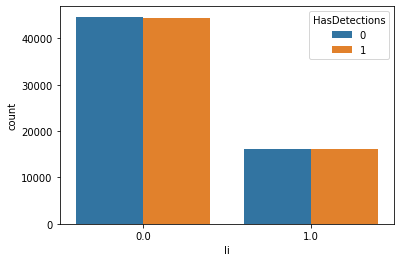

In [40]:
sns.countplot(data['li'],hue=y_train)

###### Observation
From the above bar graph we can see that whether the battery is lithium or not lithium, we have almost equal chance of getting a malware or not. Therefore we can safely say that this feature will not be as important to classify. This will come in handy when we calculate feature importance later on 

#### Replace missing values indicated as -1 with NaN

In [86]:
data['Census_InternalPrimaryDisplayResolutionVertical'].replace({-1:np.nan},inplace=True)
data['Census_InternalPrimaryDisplayResolutionHorizontal'].replace({-1:np.nan},inplace=True)
X_test['Census_InternalPrimaryDisplayResolutionVertical'].replace({-1:np.nan},inplace=True)
X_test['Census_InternalPrimaryDisplayResolutionHorizontal'].replace({-1:np.nan},inplace=True)

#### Feature Creation

In [87]:
# total disk capacity remaining
data['disk_remain'] = data['Census_PrimaryDiskTotalCapacity'] - data['Census_SystemVolumeTotalCapacity']
data['disk_remain'] = data['disk_remain'].astype('float32')

# Ram-to-CPU ratio
data['ram_cpu_ratio'] = data['Census_TotalPhysicalRAM'] / data['Census_ProcessorCoreCount']

# Pixel Per Inch PPI sqrt(horizonal**2 + vertical**2) / diagonal
data['ppi'] = np.sqrt(data['Census_InternalPrimaryDisplayResolutionHorizontal']**2 + data['Census_InternalPrimaryDisplayResolutionVertical']**2) / data['Census_InternalPrimaryDiagonalDisplaySizeInInches']

# PPI squared
data['ppi2'] = data.ppi ** 2

# Screen aspect ratio = Horizonal / Vertical
data['aspect_ratio'] = data['Census_InternalPrimaryDisplayResolutionHorizontal'] / data['Census_InternalPrimaryDisplayResolutionVertical']

# Pixel count = Horizonal * Vertical
data['pixel_count'] = data['Census_InternalPrimaryDisplayResolutionHorizontal'] * data['Census_InternalPrimaryDisplayResolutionVertical']

data.drop(['Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity','Census_TotalPhysicalRAM','Census_ProcessorCoreCount','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical','Census_InternalPrimaryDiagonalDisplaySizeInInches'],inplace=True,axis=1)

In [88]:
# total disk capacity remaining
X_test['disk_remain'] = X_test['Census_PrimaryDiskTotalCapacity'] - X_test['Census_SystemVolumeTotalCapacity']
X_test['disk_remain'] = X_test['disk_remain'].astype('float32')

# Ram-to-CPU ratio
X_test['ram_cpu_ratio'] = X_test['Census_TotalPhysicalRAM'] / X_test['Census_ProcessorCoreCount']

# Pixel Per Inch PPI sqrt(horizonal**2 + vertical**2) / diagonal
X_test['ppi'] = np.sqrt(X_test['Census_InternalPrimaryDisplayResolutionHorizontal']**2 + X_test['Census_InternalPrimaryDisplayResolutionVertical']**2) / X_test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

# PPI squared
X_test['ppi2'] = X_test.ppi ** 2

# Screen aspect ratio = Horizonal / Vertical
X_test['aspect_ratio'] = X_test['Census_InternalPrimaryDisplayResolutionHorizontal'] / X_test['Census_InternalPrimaryDisplayResolutionVertical']

# Pixel count = Horizonal * Vertical
X_test['pixel_count'] = X_test['Census_InternalPrimaryDisplayResolutionHorizontal'] * X_test['Census_InternalPrimaryDisplayResolutionVertical']
X_test.drop(['Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity','Census_TotalPhysicalRAM','Census_ProcessorCoreCount','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical','Census_InternalPrimaryDiagonalDisplaySizeInInches'],inplace=True,axis=1)

##### Dropping features in test and train whose nan values are greater than 60% since they will not be helpful

In [89]:
for col in data.columns:
    if (100*(data[col].isnull().sum()/150000))>60:
        print(col + "percent : " + str(100*(data[col].isnull().sum()/150000)))
        data.drop(col,inplace=True,axis=1)
        X_test.drop(col,inplace=True,axis=1)
        


DefaultBrowsersIdentifierpercent : 85.64533333333333
PuaModepercent : 89.97733333333333
Census_ProcessorClasspercent : 89.60733333333334
Census_IsFlightingInternalpercent : 74.74533333333333


## Imputing missing values in the data using mode for categorical variables and median for numerical variables

In [90]:
imputer = SimpleImputer(strategy='median')
for col in data.columns:
    if (data[col].isnull().sum())>0:
        if data[col].dtype=='O':
            mode=data[col].mode()[0]
            data[col].fillna(mode,inplace=True)
            X_test[col].fillna(mode,inplace=True)
            data[col]=data[col].str.lower()
            data[col].replace({"unknown":mode},inplace=True)
            X_test[col].replace({"unknown":mode},inplace=True)
        else:
            data[col] = imputer.fit_transform(data[col].values.reshape(-1,1))
            X_test[col] = imputer.transform(X_test[col].values.reshape(-1,1))



        

In [91]:
data['Census_ChassisTypeName'].fillna(data['Census_ChassisTypeName'].mode()[0],inplace=True)
X_test['Census_ChassisTypeName'].fillna(data['Census_ChassisTypeName'].mode()[0],inplace=True)

We will store the categorical features and numerical features. This will come in handy during feature scaling and for LGBM Classifier

In [8]:
categorical = [
'ProductName', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 
'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 
'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 
'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 
'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 
'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 
'Census_ActivationChannel', 'Census_FlightRing', 
'AvSigVersion', 'AppVersion', 'EngineVersion', 'Census_OSVersion' 
]
numerical = list(set(data.columns) - set(categorical))

In [166]:
pickle.dump(data,open("data_lgb.p","wb"))
pickle.dump(X_test,open("y_lgb.p","wb"))

## One Hot Encoding the data.

In [93]:
train=pd.get_dummies(data,columns=categorical,sparse=True)
test=pd.get_dummies(X_test,columns=categorical,sparse=True)

### Since it is possible for test data to have values which are not present in training data for some categorical feature, we will add a column for every such variable and make it 0 for test

In [94]:
missing_cols = set( train.columns ) - set( test.columns )
i=0
for c in missing_cols:
    test[c] = 0
test = test[train.columns]

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

Defining the range for which we will test our hyper parameters

In [62]:
max_depth = np.arange(10,150,10)
min_samples_leaf=np.arange(10,100,10)
n_estimators = np.arange(10,100,10)
param_grid = {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'n_estimators':n_estimators}

The range is large and this might take a lot of time to test out hyperparameters. So we will try to reduce the search space for the hyperparameters by individually conducting a validation testing and picking up a range for which we see the least error. This will narrow our search space

In [63]:
x_train, x_val, y_train_1, y_val = train_test_split(train, y_train, test_size=0.25, random_state=42)

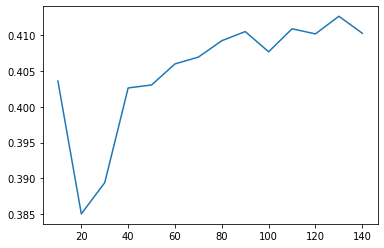

In [64]:
e=[]
for depth in max_depth:
    forest = RandomForestClassifier(max_depth=depth)
    forest.fit(x_train,y_train_1)
    yhat=forest.predict(x_val)
    e.append(np.mean(yhat!=y_val))
plt.plot(max_depth,e)

From the plot above it is safe to assume that the least error is obtained for a max_depth between 10 and 40

In [65]:
e=[]
for leaf in min_samples_leaf:
    forest = RandomForestClassifier(min_samples_leaf=leaf)
    forest.fit(x_train,y_train_1)
    yhat=forest.predict(x_val)
    e.append(np.mean(yhat!=y_val))

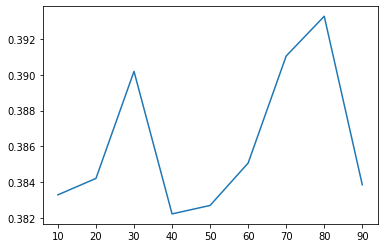

In [66]:
plt.plot(min_samples_leaf,e)

From the plot above it is safe to assume that the least error is obtained for a min_samples between 30 and 50

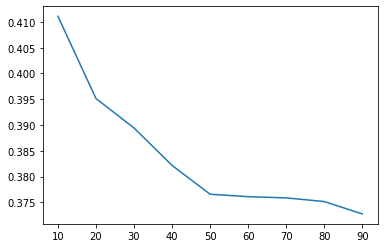

In [67]:
e=[]
for est in n_estimators:
    forest = RandomForestClassifier(n_estimators=est)
    forest.fit(x_train,y_train_1)
    yhat=forest.predict(x_val)
    e.append(np.mean(yhat!=y_val))
plt.plot(n_estimators,e)

From the plot above it is safe to assume that the least error is obtained for a n_estimators=90

#### Reducing the search space from above made observations so as to reduce the running time

In [96]:
max_depth = np.arange(10,40,10)
min_samples_leaf=np.array([30,50,70])
param_grid = {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}

##### Conducting hyper parameter tuning and validation testing with K-Fold method using GridSearchCV

In [70]:
forest = RandomForestClassifier(n_estimators=90)
cvf = GridSearchCV(forest,param_grid,return_train_score=True,refit=True,cv=5,scoring = make_scorer(accuracy_score,greater_is_better=True))

In [71]:
cvf.fit(train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=90, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [97]:
depth=cvf.best_params_['max_depth']
leaves = cvf.best_params_['min_samples_leaf']

##### Training our model

In [98]:
forest = RandomForestClassifier(max_depth=depth,min_samples_leaf=leaves,n_estimators=90)
forest.fit(train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
y_pred = forest.predict(test)
print("Test error is " + str(np.mean(y_pred!=y_test)))

Test error is 0.3698666666666667


### Test error comes out to be 36.9%

# SVM

Performing feature scaling on the data for normalization. Feature scaling performed using MinMaxScaler. This scaling was performed on both test and train data

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True)
for col in numerical:
    train[col] = scaler.fit_transform(np.array(train[col]).reshape(-1,1))
    test[col] = scaler.transform(np.array(test[col]).reshape(-1,1))

##### Conducting hyper parameter tuning and validation testing with K-Fold method using GridSearchCV

In [105]:
c = np.arange(1,11,1)
param_grid = {'C':c}

In [107]:
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l2')
cvf = GridSearchCV(svm,param_grid,return_train_score=True,refit=True,cv=5,scoring = make_scorer(accuracy_score,greater_is_better=True))
cvf.fit(train,y_train)

C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(accuracy_score), verbose=0)

In [109]:
C=cvf.best_params_['C']

Conductiong individual validation testing on epochs since including epochs in GridSearch increases training time exponentially

In [110]:
train_svm, val_svm, y_train_svm, y_val_svm = train_test_split(train, y_train, test_size=0.25, random_state=42)

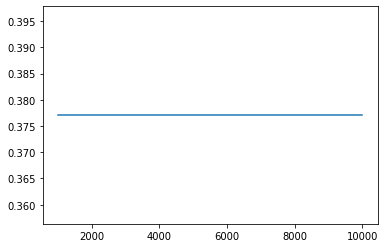

In [115]:
epochs = 1000*np.arange(1,11,1)
e=[]
for epoch in epochs:
    svc = LinearSVC(max_iter=epoch,dual=False,C=C,penalty='l2')
    svc.fit(train_svm,y_train_svm)
    y_pred_svm=svc.predict(val_svm)
    e.append(np.mean(y_pred_svm!=y_val_svm))
plt.plot(epochs,e)
    

As we can see, by changing the number of epochs we dont see any performance improvement. That means we can pick any parameter

In [134]:
svc = LinearSVC(max_iter=5000,dual=False,C=C,penalty='l2')
svc.fit(train,y_train)
y_pred_svm=svc.predict(test)
print("error rate SVM = ",np.mean(y_pred_svm!=y_test))

error rate SVM =  0.38666666666666666


### Test error comes out to be 38.6%

## SVM With Feature selection

### Dimensionality Reduction

Extracting out the feature importance values from Random forest

In [118]:
importance = forest.feature_importances_
feature_imp = pd.DataFrame(columns=['Features','Importance'])
feature_imp['Features'] = train.columns
feature_imp['Importance'] = importance

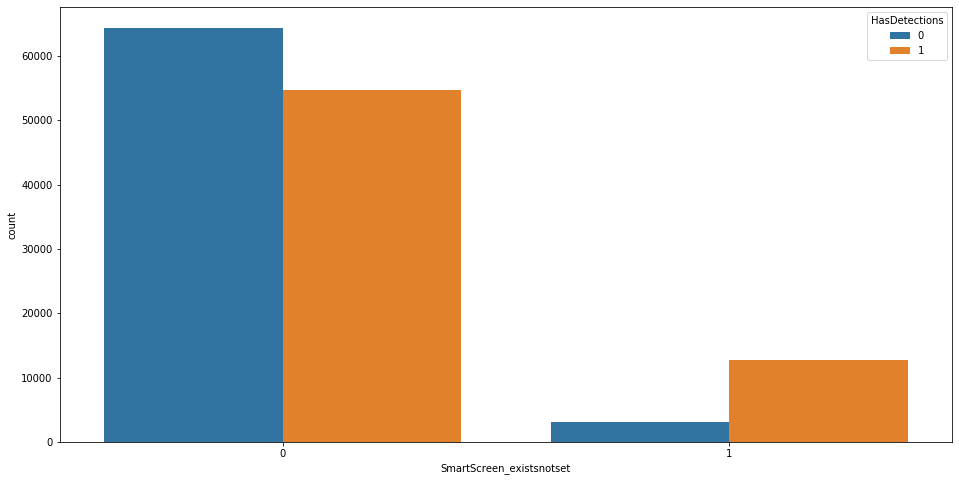

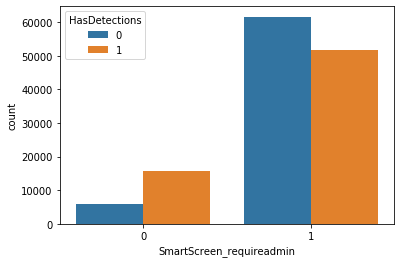

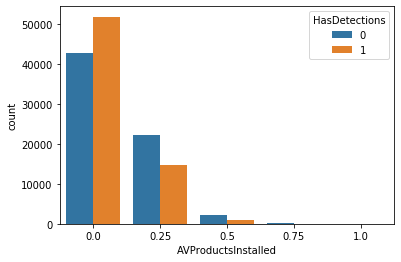

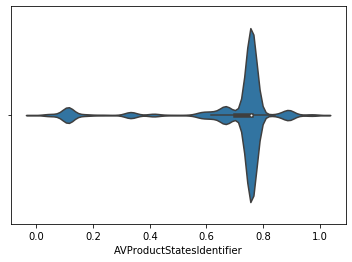

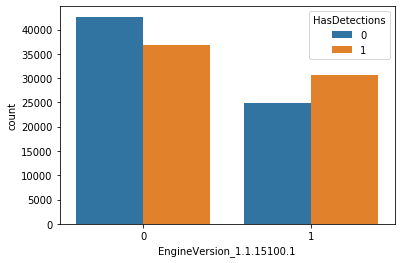

In [119]:
feature_imp_2=feature_imp.sort_values(by=['Importance'],ascending=False)
plt.figure(figsize=(16,8))
for i in range(5):
    if train[feature_imp_2['Features'].iloc[i]].unique().shape[0]<10:
        sns.countplot(train[feature_imp_2['Features'].iloc[i]], hue=y_train)
    else:
        sns.violinplot(train[feature_imp_2['Features'].iloc[i]],hue=y_train)
    plt.show()

From the above plots it is easy to observe that the 5 most important features actually tell us some information about the classification. One important observation is that most of them are categorical features

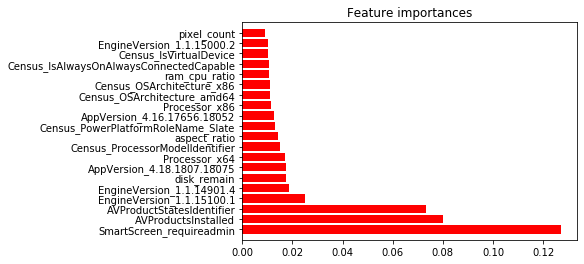

In [129]:
plt.figure()
plt.title("Feature importances")
indices = np.arange(1,21,1)
plt.barh(range(20),feature_imp_2['Importance'].iloc[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(20), [feature_imp_2['Features'].iloc[i] for i in indices])
plt.ylim([-1, 20])
plt.show()

### Checking for performance imporvement of SVM after removing features with 0 importance

In [130]:
indexes=list(np.where(forest.feature_importances_==0)[0])

In [133]:
train_modified = train.drop(train.columns[indexes],inplace=False,axis=1)
test_modified = test.drop(test.columns[indexes],inplace=False,axis=1)

In [135]:
svc = LinearSVC(max_iter=5000,dual=False,C=C,penalty='l2')
svc.fit(train_modified,y_train)
y_pred_svm_modified=svc.predict(test_modified)
print("Error=",np.mean(y_pred_svm_modified!=y_test) )

Error= 0.3818


#### As we can see the performance improved slightly. If we remove more features we might improve performance but if we remove too many features, we might lose information and increase the error, therefore threshold has become a new hyper parameter which we will need to tune

In [140]:
unique_importances = np.unique(forest.feature_importances_)
unique_importances = np.sort(unique_importances)

In [143]:
train_svm_f, val_svm_f, y_train_svm_f, y_val_svm_f = train_test_split(train, y_train, test_size=0.25, random_state=42)

In [151]:
e=[]
for threshold in unique_importances[:10]:
    indexes=list(np.where(forest.feature_importances_<=threshold)[0])
    train_modified = train_svm_f.drop(train.columns[indexes],inplace=False,axis=1)
    test_modified = val_svm_f.drop(test.columns[indexes],inplace=False,axis=1)
    svc = LinearSVC(max_iter=5000,dual=False,C=C,penalty='l2')
    svc.fit(train_modified,y_train_svm_f)
    y_pred_svm_modified_f=svc.predict(test_modified)
    e.append(np.mean(y_pred_svm_modified_f!=y_val_svm_f))

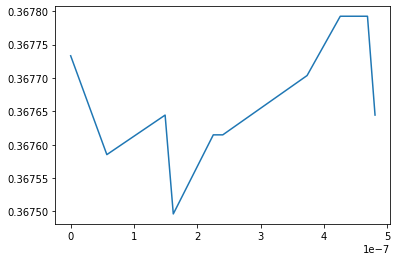

In [152]:
plt.plot(unique_importances[:10],e)
plt.show()

In [153]:
threshold = unique_importances[np.argmin(e)]
indexes=list(np.where(forest.feature_importances_<=threshold)[0])
train_modified = train.drop(train.columns[indexes],inplace=False,axis=1)
test_modified = test.drop(test.columns[indexes],inplace=False,axis=1)
svc = LinearSVC(max_iter=5000,dual=False,C=C,penalty='l2')
svc.fit(train_modified,y_train)
y_pred_svm_modified_f=svc.predict(test_modified)
print("Test Error is ",np.mean(y_pred_svm_modified_f!=y_test))

Test Error is  0.3814666666666667


We see that there is a performance improvement over the previous one

### After performing dimensionality reduction, test error improved from 38.6% to 38.1%

# Additional Experiment LightGBM

In [1]:
import lightgbm as lgb

Loading value from pickle files which were stored since the data is large

In [4]:
train_lgb=pickle.load(open("data_lgb.p","rb"))
y_train_lgb=pickle.load(open("y_train.p","rb"))
y_test_lgb=pickle.load(open("y_test.p","rb"))
test_lgb=pickle.load(open("y_lgb.p","rb"))

##### Here we are trying to make the data compliant with the one which is expected by LightGBM by setting the data type of all categorical features as category

In [25]:
for c in train_lgb.columns:
    col_type = train_lgb[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        train_lgb[c] = train_lgb[c].astype('category')
        test_lgb[c] = test_lgb[c].astype('category')

Defining training hyper parameters

In [29]:
fit_params={ 
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

Reducing the Hyper parameter search space as performed in Random forest

In [44]:
num_leaves=np.arange(100,1001,100)
learning_rate=[0.001,0.005,0.01,0.05]

In [36]:
train_lgb_f, val_lgb_f, y_train_lgb_f, y_val_lgb_f = train_test_split(train_lgb, y_train_lgb, test_size=0.25, random_state=42)

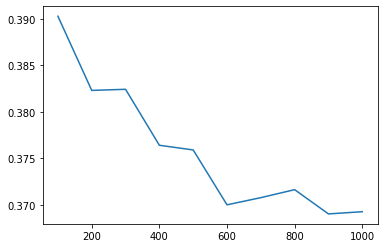

In [37]:
e=[]
for leaf in num_leaves:
    clf = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=2000,num_leaves=leaf)   
    clf.fit(train_lgb_f,y_train_lgb_f,**fit_params)
    yhat=clf.predict(val_lgb_f)
    e.append(np.mean(yhat!=y_val_lgb_f))
plt.plot(num_leaves,e)

In [ ]:
e=[]
for rate in learning_rate:
    clf = lgb.LGBMClassifier(boosting_type='gbdt',n_estimators=2000,learning_rate=rate)   
    clf.fit(train_lgb_f,y_train_lgb_f,**fit_params)
    yhat=clf.predict(val_lgb_f)
    e.append(np.mean(yhat!=y_val_lgb_f))

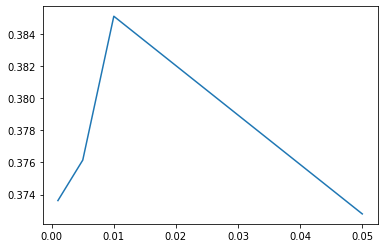

In [43]:
plt.plot(learning_rate,e)

In [45]:
num_leaves=[800,900,1000]
learning_rate=[0.001,0.05]
param_grid={'num_leaves':num_leaves,'learning_rate':learning_rate}

Hyperparameter tuning and validation testing using Grid Search

In [46]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', 
                                 n_estimators=2000)
cvf = GridSearchCV(clf,param_grid,return_train_score=True,refit=True,cv=5,scoring = make_scorer(accuracy_score,greater_is_better=True))
cvf.fit(train_lgb,y_train_lgb)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=2000,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.05],
                         '

In [51]:
print("Validation error is ", 1-cvf.best_score_)

Validation error is  0.3706990422151275


In [53]:
best_rate=cvf.best_params_['learning_rate']
best_leaf=cvf.best_params_['num_leaves']

In [55]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=best_rate,num_leaves=best_leaf,
                                 n_estimators=2000)
clf.fit(train_lgb,y_train_lgb,**fit_params)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_leaves=900, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [58]:
y_pred_lgb = clf.predict(test_lgb)
print("Test Error is",np.mean(y_pred_lgb!=y_test_lgb))

Test Error is 0.3751333333333333


### Test error comes out to be 37.5%

# Performance Metrics

### Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
def print_confusion_matrix(yhat,yts):
    C = confusion_matrix(yts,yhat)
    Csum = np.sum(C,1)
    C = C / Csum[None,:]
    print(np.array_str(C, precision=3, suppress_small=True))
    plt.imshow(C, interpolation='none')
    plt.colorbar()

#### Random Forest

[[0.626 0.371]
 [0.369 0.635]]


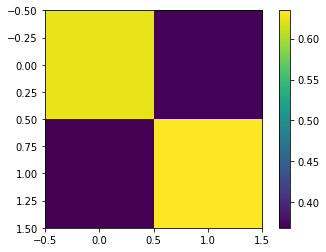

In [173]:
print_confusion_matrix(y_pred,y_test)

#### SVM

SVM without feature deletion
[[0.745 0.253]
 [0.512 0.493]]


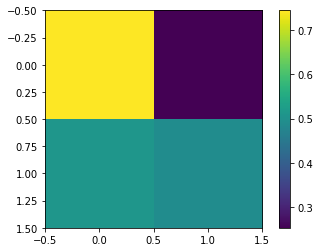

In [183]:
print("SVM without feature deletion")
print_confusion_matrix(y_pred_svm_modified,y_test)

SVM with feature deletion
[[0.746 0.252]
 [0.512 0.492]]


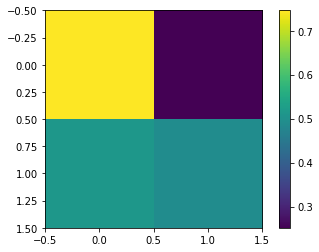

In [184]:
print("SVM with feature deletion")
print_confusion_matrix(y_pred_svm_modified_f,y_test)

#### LGBM Classifier

[[0.698 0.3  ]
 [0.451 0.553]]


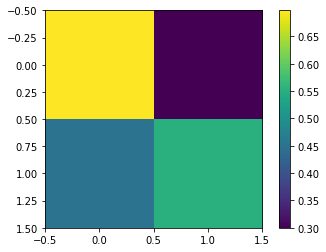

In [61]:
print_confusion_matrix(y_pred_lgb,y_test_lgb)

### Area Under curve Score

In [63]:
import numpy as np
from sklearn import metrics
def auc(y_pred,y):    
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
    return metrics.auc(fpr, tpr)

#### Random Forest

In [180]:
print(auc(y_pred,y_test))

0.6301140842101729


#### SVM

In [182]:
print("SVM without feature deletion",auc(y_pred_svm_modified,y_test))
print("SVM with feature deletion",auc(y_pred_svm_modified_f,y_test))

SVM without feature deletion 0.6187383393432798
SVM with feature deletion 0.6190759454892121


#### LGBM Classifier

In [64]:
print(auc(y_pred_lgb,y_test_lgb))

0.6251752920799837


# Results

The below table captures the summary of the results of all our findings

In [4]:
columns=['Classifier','Test Error(%)','AUC Score']
results = pd.DataFrame(columns=columns)
results['Classifier'] = np.array(['Random Forest','Linear SVM','Linear SVM after Dimensionality Reduction','LGBMClassifier'])
results['Test Error(%)'] = np.array([36.9,38.6,38.1,37.5])
results['AUC Score'] = np.array([0.63,0.618,0.619,0.625])
results

,Classifier,Test Error(%),AUC Score
0,Random Forest,36.9,0.630
1,Linear SVM,38.6,0.618
2,Linear SVM after Dimensionality Reduction,38.1,0.619
3,LGBMClassifier,37.5,0.625


From the above results we can see that Random forest gives us the best accuracy followed by LGBMClassifier and then SVM <br>
##### For SVM we see that our hypothesis was correct and indeed after removing unimportant feature there is an improvement in performance<br>
From the above we can make 3 claims<br>
1. In this problem Tree based ensemble methods are better when it comes towards handling categorical features and large data set than SVM in terms of computational performance and accuracy
2. Gaussian kernel was not possible since the dimension of the data is large and it was not omputationally feasable as it forms an infinite space feature kernel
3. Dimensionality reduction improved performance for SVM. This might be because unimportant features affect the support vectors such that it degrades the accuracy<br>

# Evaluation of our Findings

Random Forest - From the confusion matrix we can see we have a higher amount of false positives than false negatives. This is still good because in our problem it is better to classify a machine as a malware than not classifying a malware machine as one. From the business perspective, false positive cases helps them to put additional checks on that machine so that it does not get affected by malware<br>
The highest AUC score also implies that this model has the best measure of seperability than the other classifiers

LightGBM - The confusion matrix shows that it has a higher rate of false negatives. This means that our model failed to classify that it was a malware when it was actually one<br>
The AUC score is slightly less than Random forest which shows that the hyper parameters were not tuned properly

SVM - Both the instances of SVM nearly have the same confusion matrix plot. The AUC score is also similar. The false negative score is higher than that of all the other classifiers that we trained which means that there are more chances of misclassifying the actual malware as wrong.

### From all the performance metrics it is safe to say that Random Forest is the better classifier in our problem and it should be used for classification

# Possible Next Steps

It should be noted that this problem was picked from an ongoing kaggle competition. The leader has an AUC Score of 0.66. In comparison to that our AUC score is pretty good which means that with a little bit more hyper parameter tuning, we can improve the accuracy. Some possible steps that we would like to take

1. LightGBM is a rally good gradient boosting classifier but it has a huge number of hyper parameters. In this problem we have just picked 2 of them. In future there is a huge amount of scope to improve the performance by including more hyper parameters to tune<br>
2. The original dataset had 9 million rows. We had picked 150K rows because of hardware limitations. We would like to extend the problem to encorporate all the data since more training data will help to better train our model<br>
3. In future we would like to perform other classifiers as well like AdaBoost etc. Also there is a scope of using other kernels as well with better hardware (More RAM)
4. Training models on GPU lead to faster training times and thus can give you more time for experimentations. Most of sklearn's libraries are not implemented on GPUs. However other libraries like tensorflow can. This problem can be included to encorporate that as well to improve the performance

